<a href="https://colab.research.google.com/github/brem-21/Health-EDA/blob/main/Health_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading and Inspection**

### Importing necessary libraries

In [1]:
# pandas to load and manipulate the data from it's source
import pandas as pd

# Numpy for numerical calculations
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Loading the Dataset

In [2]:
# Loading the dataset from source/directory
heart_data =  pd.read_csv('/content/heart_data.csv')

# printing first five(5) columns
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Inspecting the Dataset

In [3]:
# Information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
# Descriptive statistics of the dataset
heart_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [5]:
# Viewing the 'ca' column to check for right data
heart_data.ca

,ca
0,0.0
1,3.0
2,2.0
3,0.0
4,0.0
...,...
298,0.0
299,2.0
300,1.0
301,1.0


In [6]:
# Checking for unique values in the 'ca' column and viewing it in a dataframe
pd.DataFrame(heart_data['ca'].unique())

,0
0,0.0
1,3.0
2,2.0
3,1.0
4,?


In [7]:
# Checking for unique values in the 'thal' column and viewing it in a dataframe
pd.DataFrame(heart_data['thal'].unique())

,0
0,6.0
1,3.0
2,7.0
3,?


# Data Cleaning


### Handling Misrepresented Data in Columns

In [8]:
# Handling misrepresented Data in 'ca' column by replacing '?' value with Nan(Not a Number)
heart_data['ca'].replace('?',np.nan,inplace=True)

In [9]:
# Handling misrepresented Data in 'thal' column by replacing '?' value with Nan(Not a Number)
heart_data['thal'].replace('?',np.nan,inplace=True)

<ipython-input-9-bb188b8530a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['thal'].replace('?',np.nan,inplace=True)


In [10]:
# Viewing the 'ca' column to confirm the misrepresented handling
heart_data['ca']

,ca
0,0.0
1,3.0
2,2.0
3,0.0
4,0.0
...,...
298,0.0
299,2.0
300,1.0
301,1.0


In [11]:
# Viewing the 'thal' column to confirm the misrepresented handling
heart_data['thal']

,thal
0,6.0
1,3.0
2,7.0
3,3.0
4,3.0
...,...
298,7.0
299,7.0
300,7.0
301,3.0


In [12]:
# first five rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Handling Missing Values

In [13]:
# checking for missing values in the dataset
# count missing values in each column
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
# checking for duplicates in the dataset
heart_data.duplicated().sum()

0

In [15]:
# converting the 'ca' column to an array to manually check for missing values
np.array(heart_data.ca)

array(['0.0', '3.0', '2.0', '0.0', '0.0', '0.0', '2.0', '0.0', '1.0',
       '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '2.0', '2.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '1.0', '0.0', '3.0', '0.0', '2.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '3.0',
       '0.0', '1.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0',
       '2.0', '2.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '3.0', '3.0', '0.0', '0.0', '1.0', '1.0', '2.0', '1.0',
       '0.0', '0.0', '0.0', '1.0', '1.0', '3.0', '0.0', '1.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0',
       '0.0', '3.0', '1.0', '2.0', '3.0', '0.0', '0.0', '1.0', '0.0',
       '2.0', '1.0',

In [16]:
# converting the 'thal' column to an array to manually check for missing values
np.array(heart_data.thal)

array(['6.0', '3.0', '7.0', '3.0', '3.0', '3.0', '3.0', '3.0', '7.0',
       '7.0', '6.0', '3.0', '6.0', '7.0', '7.0', '3.0', '7.0', '3.0',
       '3.0', '3.0', '3.0', '3.0', '3.0', '7.0', '7.0', '3.0', '3.0',
       '3.0', '3.0', '7.0', '3.0', '7.0', '3.0', '7.0', '3.0', '3.0',
       '7.0', '6.0', '7.0', '3.0', '7.0', '7.0', '3.0', '3.0', '3.0',
       '7.0', '3.0', '7.0', '3.0', '3.0', '3.0', '7.0', '3.0', '3.0',
       '7.0', '7.0', '7.0', '7.0', '3.0', '3.0', '7.0', '3.0', '7.0',
       '3.0', '7.0', '7.0', '3.0', '7.0', '7.0', '3.0', '3.0', '7.0',
       '7.0', '6.0', '3.0', '3.0', '7.0', '3.0', '3.0', '7.0', '3.0',
       '3.0', '3.0', '7.0', '3.0', '3.0', '3.0', nan, '3.0', '3.0', '3.0',
       '7.0', '7.0', '3.0', '3.0', '7.0', '7.0', '7.0', '3.0', '3.0',
       '3.0', '3.0', '3.0', '3.0', '7.0', '7.0', '7.0', '7.0', '7.0',
       '7.0', '7.0', '3.0', '6.0', '7.0', '7.0', '6.0', '3.0', '3.0',
       '7.0', '7.0', '7.0', '7.0', '3.0', '7.0', '3.0', '3.0', '7.0',
       '7.0', '

In [17]:
# Filling the 'ca' columns with forward fill(the value in front of the row with the missing value)
heart_data['ca'] = heart_data['ca'].fillna(heart_data['ca'].mode()[0])

# Filling the 'thal' columns with forward fill(the value in front of the row with the missing value)
heart_data['thal'] = heart_data['thal'].fillna(heart_data['thal'].mode()[0])

In [18]:
# confirming if the missing values has been handled
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [19]:
print("\nUnique values per column:")
pd.DataFrame(heart_data.nunique())


Unique values per column:


,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


### Bivariate Analysis
##### Correlation Matrix

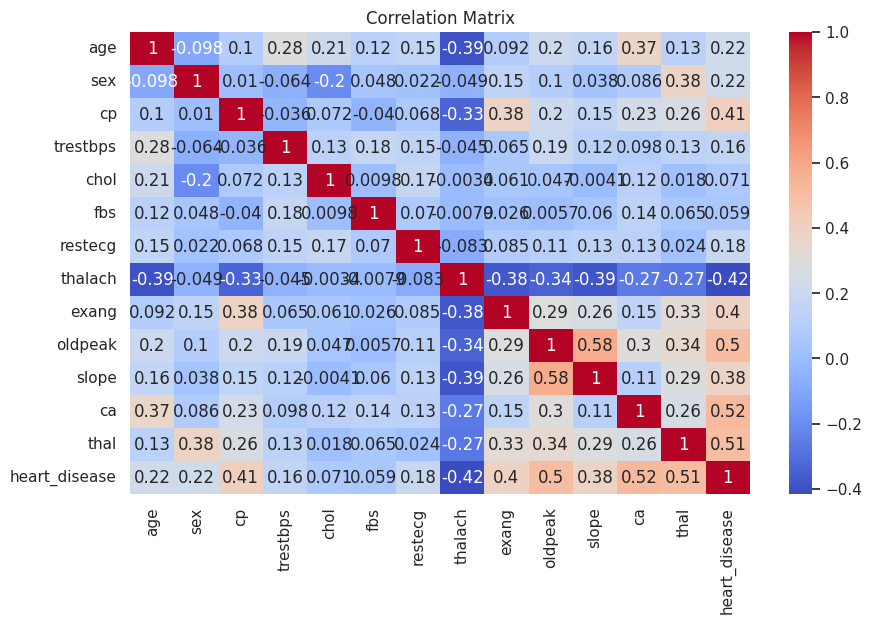

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### DATA CONVERSION
#### For easy Analysis. Inplace of Integers and floats, Convert them to their original values as Strings


In [21]:
# Map sex values (0.0 -> 'Male', 1.0 -> 'Female') for easy Identification of Gender
heart_data['sex'] = heart_data['sex'].map({1.0: 'Male', 0.0: 'Female'})


In [22]:
# Map cp values for easy Identification
heart_data['cp'] = heart_data['cp'].map({1.0: 'Typical Angina', 2.0: 'Atypical Angina',
                                         3.0: 'Non-anginal Pain', 4.0: 'Asymptomatic'})


In [23]:
# Renaming Columns for easy Identification and Analysis
column_rename = {
    'age': 'age',
    'sex': 'Gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'heart_disease': 'heart_disease'
}

heart_data.rename(columns=column_rename, inplace=True)

In [24]:
# Converting age columns from float to Integer
heart_data['age'] = heart_data['age'].astype(int)

In [25]:
# Map  values for easy Identification
heart_data['fasting_blood_sugar'] = heart_data['fasting_blood_sugar'].map({1.0: 'True', 0.0: 'False'})


In [26]:
# Map  values for easy Identification
heart_data['rest_ecg'] = heart_data['rest_ecg'].map({0.0: 'Normal', 1.0: 'Having ST-T wave abnormality', 2.0: 'showing probable or definite left ventricular hypertrophy by Estes criteria'})


In [27]:
# checking for unique values for thalassemia column
print(heart_data['thalassemia'].unique())

# converting the column to numeric column
heart_data['thalassemia'] = pd.to_numeric(heart_data['thalassemia'], errors='coerce')


['6.0' '3.0' '7.0']


In [28]:
# Map  values for easy Identification
heart_data['thalassemia'] = heart_data['thalassemia'].map({
    3.0: 'normal',
    6.0: 'fixed_defect',
    7.0: 'reversible_defect'
})

In [29]:
# Mapping for 'exercise_induced_angina'
heart_data['exercise_induced_angina'] = heart_data['exercise_induced_angina'].map({
    1.0: 'Yes',
    0.0: 'No'
})



In [30]:
# Mapping for 'st_slope'
heart_data['st_slope'] = heart_data['st_slope'].map({
    1.0: 'upsloping',
    2.0: 'flat',
    3.0: 'downsloping'
})

In [31]:
heart_data.head()

,age,Gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,Male,Typical Angina,145.0,233.0,True,showing probable or definite left ventricular ...,150.0,No,2.3,downsloping,0.0,fixed_defect,0
1,67,Male,Asymptomatic,160.0,286.0,False,showing probable or definite left ventricular ...,108.0,Yes,1.5,flat,3.0,normal,2
2,67,Male,Asymptomatic,120.0,229.0,False,showing probable or definite left ventricular ...,129.0,Yes,2.6,flat,2.0,reversible_defect,1
3,37,Male,Non-anginal Pain,130.0,250.0,False,Normal,187.0,No,3.5,downsloping,0.0,normal,0
4,41,Female,Atypical Angina,130.0,204.0,False,showing probable or definite left ventricular ...,172.0,No,1.4,upsloping,0.0,normal,0


In [32]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   Gender                   303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    float64
 4   serum_cholesterol        303 non-null    float64
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate           303 non-null    float64
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    object 
 12  thalassemia              303 non-null    object 
 13  heart_disease            303 non-null    int64  
dtypes: float64(4), int64(2), o

# Univariate Analysis

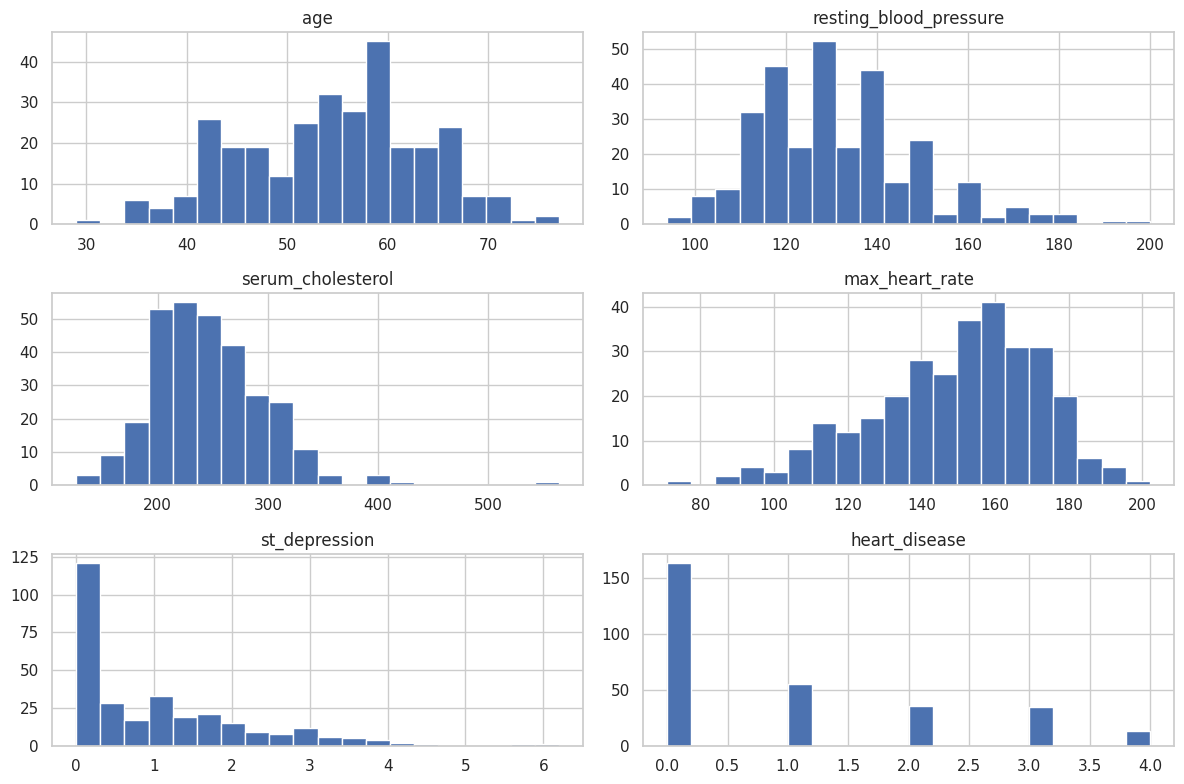

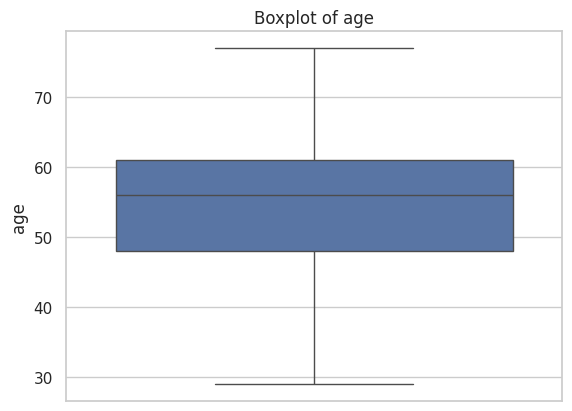

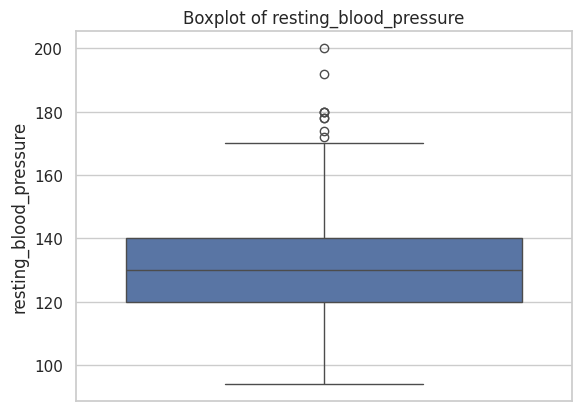

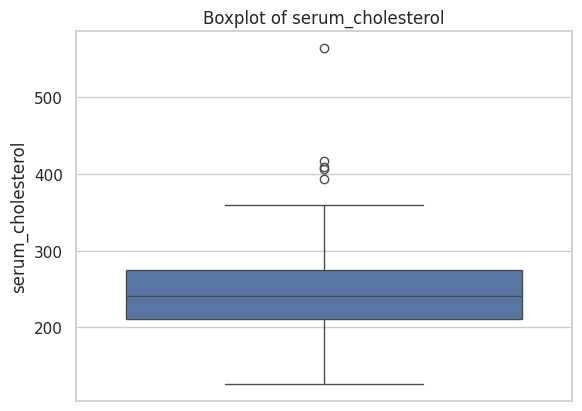

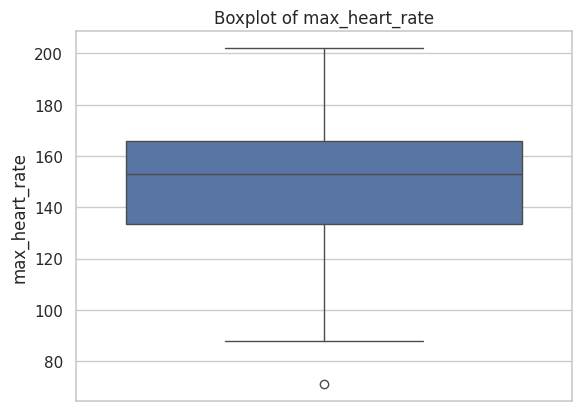

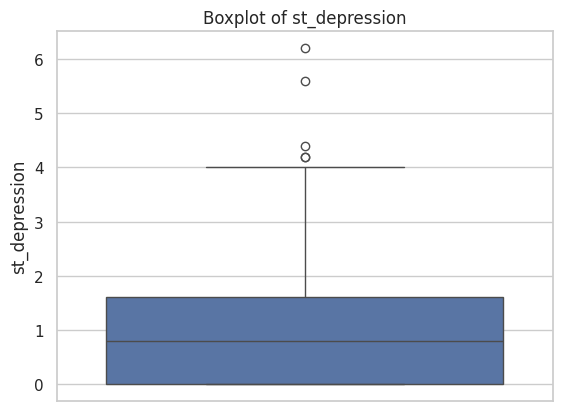

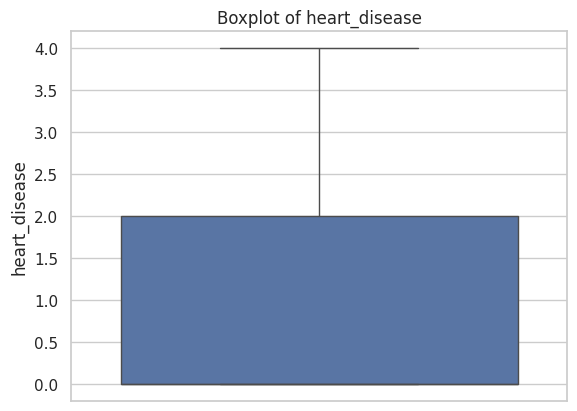

In [33]:
# Histograms
heart_data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplots
numerical_cols = heart_data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.boxplot(y=heart_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


<Figure size 1200x1200 with 0 Axes>

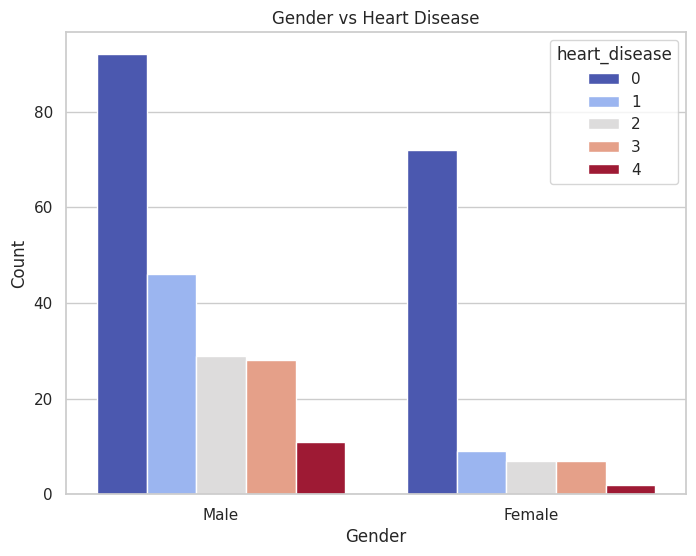

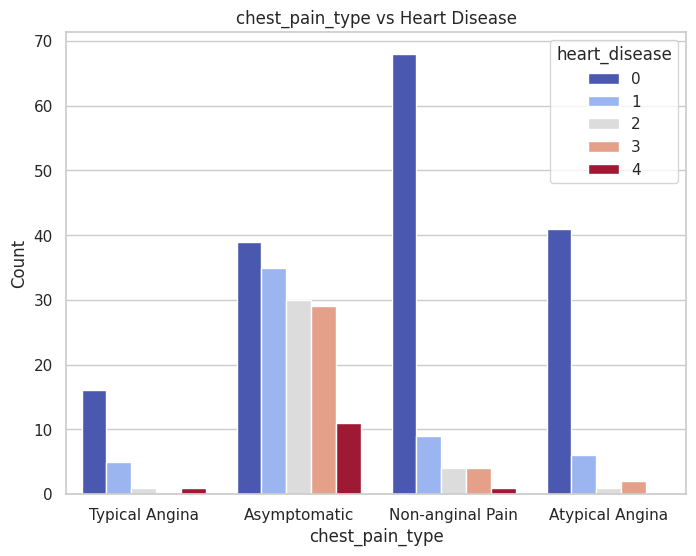

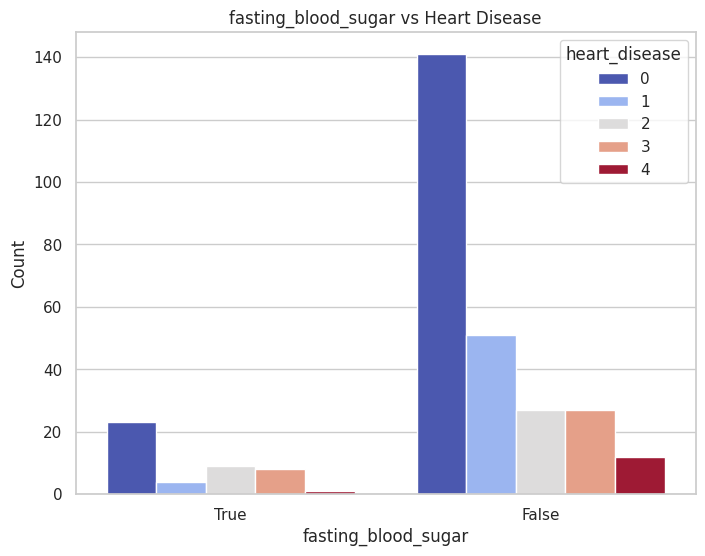

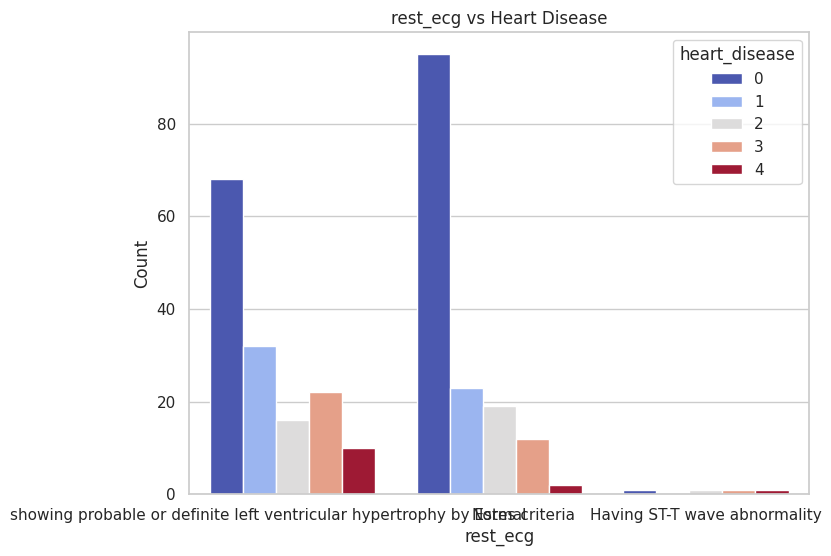

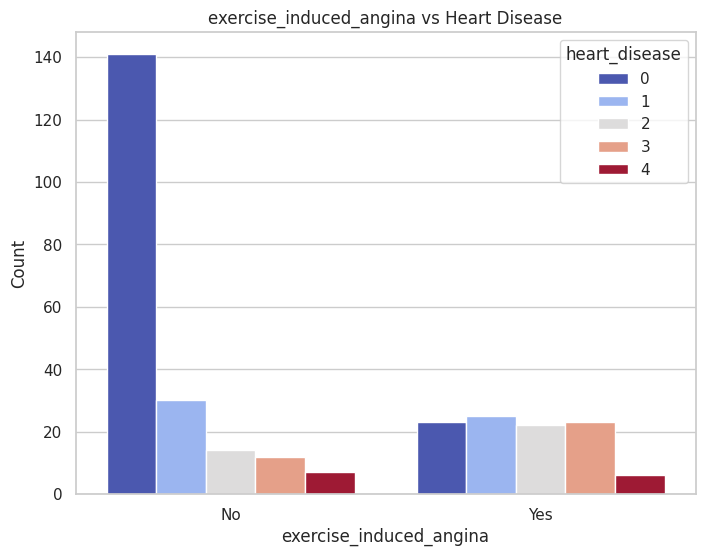

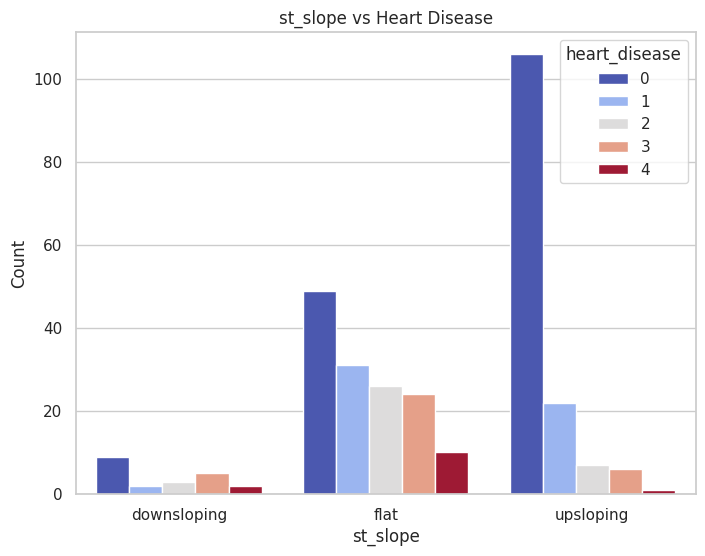

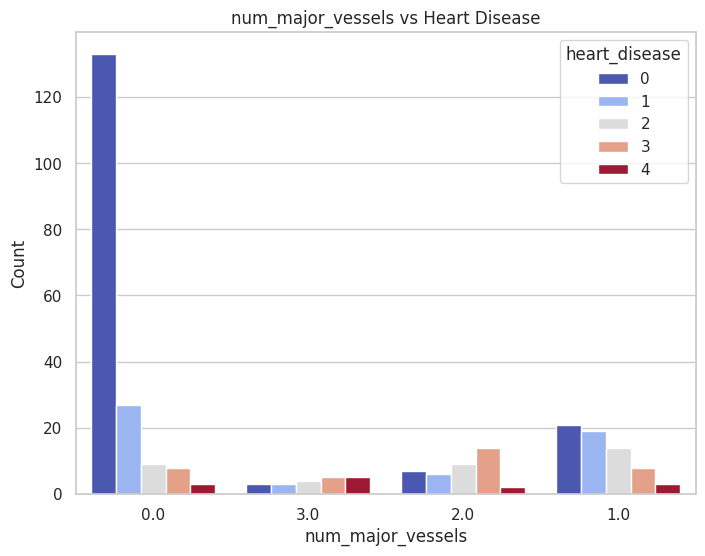

In [34]:
categorical_cols = ['Gender', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                    'exercise_induced_angina', 'st_slope', 'num_major_vessels']

plt.figure(figsize=(12, 12))

# Creating bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))  # Set the figure size for each plot
    sns.countplot(data=heart_data, x=col, hue='heart_disease', palette='coolwarm')  # Bar plot with target as hue
    plt.title(f'{col} vs Heart Disease')  # Set the title for each plot
    plt.xlabel(col)  # Label for x-axis
    plt.ylabel('Count')  # Label for y-axis
    plt.show()  # Display the plot

# Bivariate Analysis


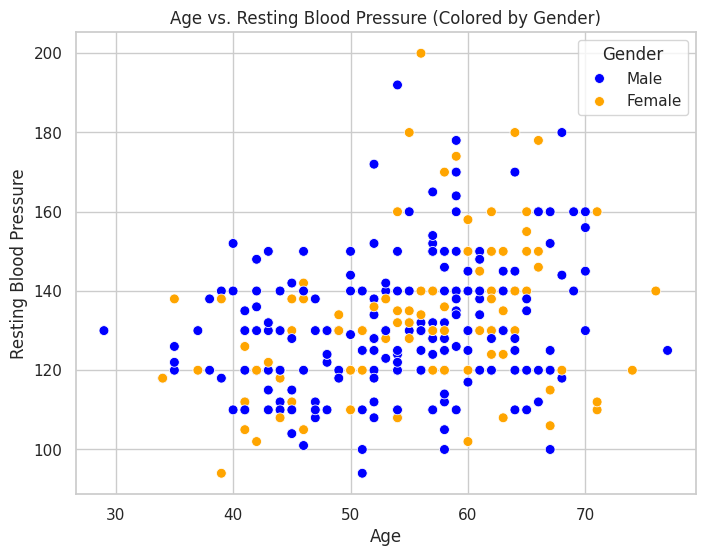

In [35]:
# Scatter plot to explore relationship between Age and Resting Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=heart_data['age'],
    y=heart_data['resting_blood_pressure'],
    hue=heart_data['Gender'],  # Gender column (Male/Female)
    palette={'Male': 'blue', 'Female': 'orange'},
    s=50
)

plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs. Resting Blood Pressure (Colored by Gender)')
plt.legend(title='Gender')
plt.show()

### Comparing target across independent variables using boxplots

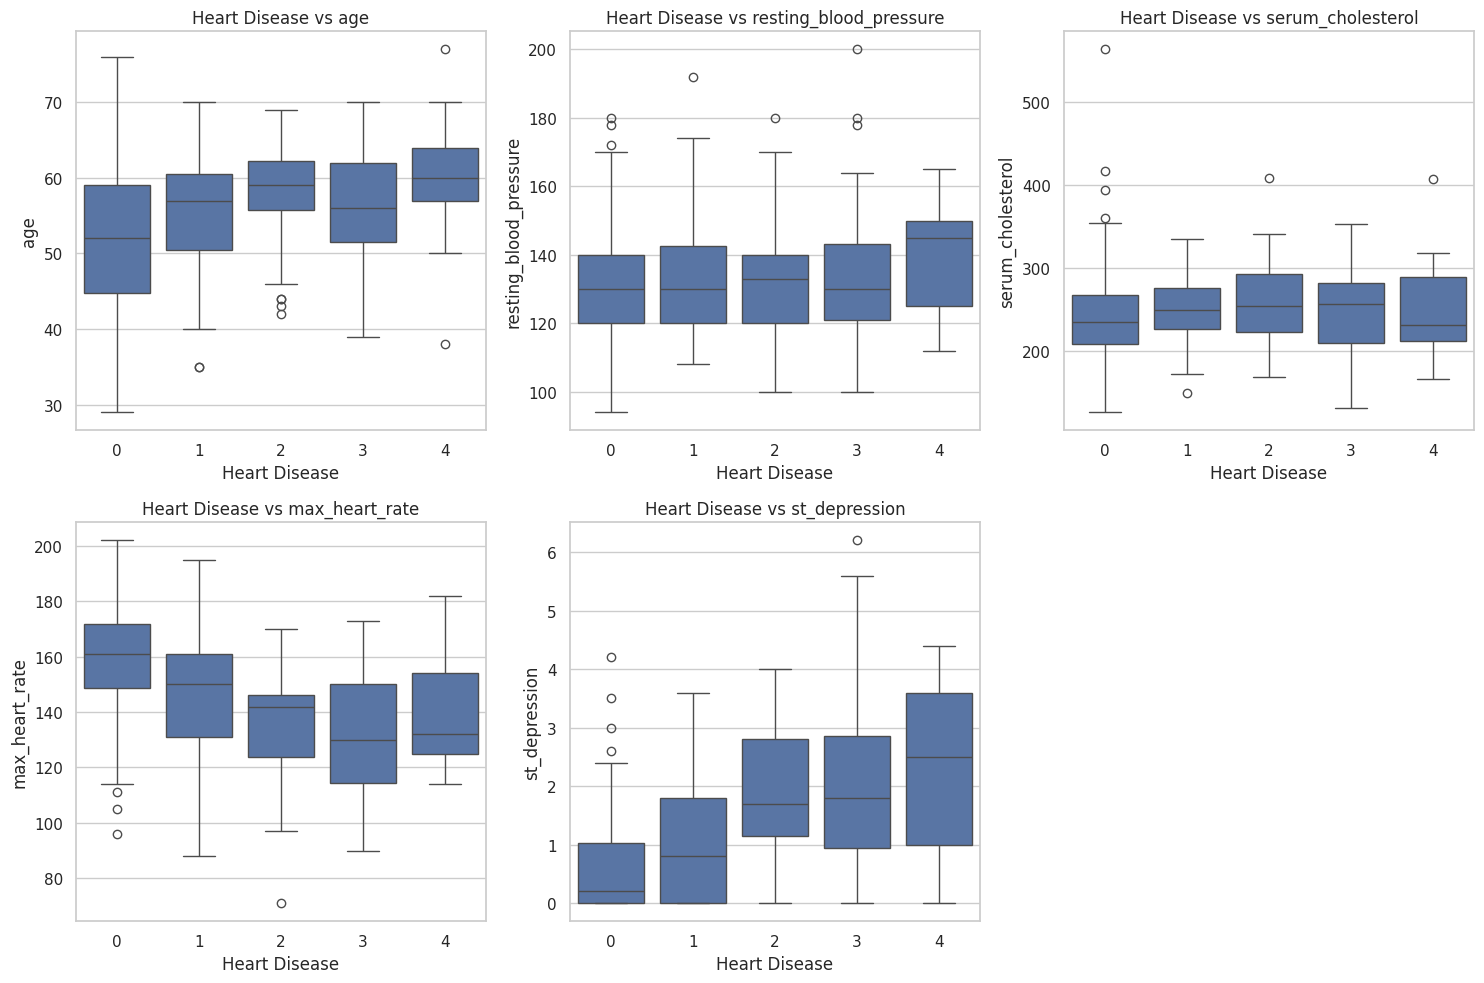

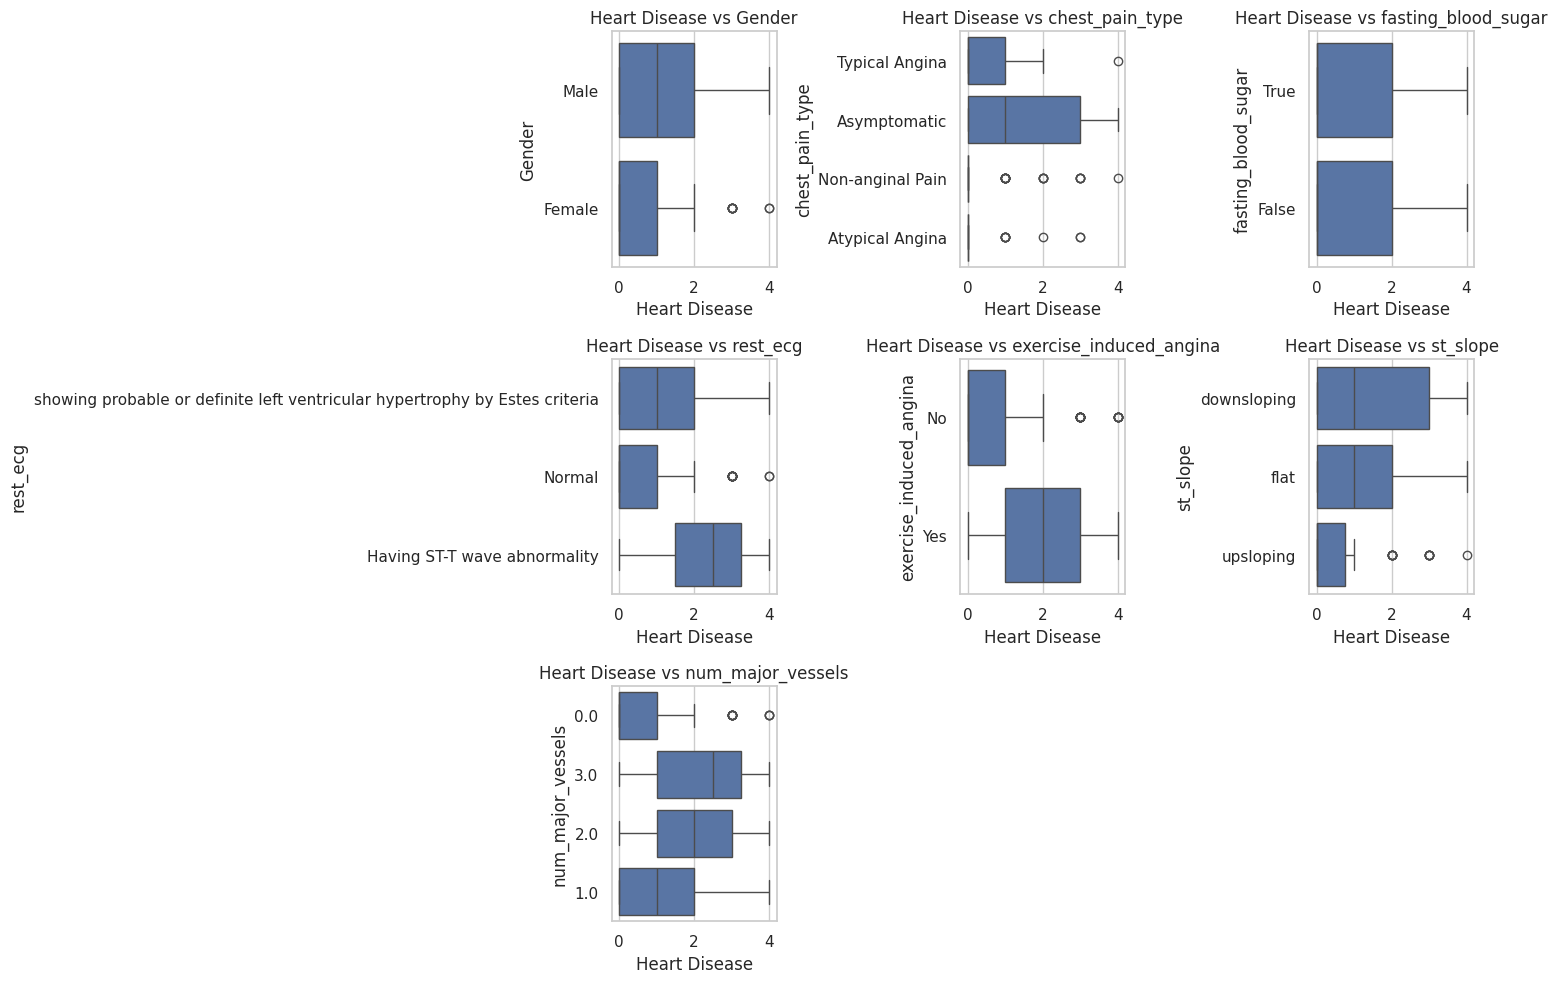

In [36]:
# Define the columns for independent variables
numerical_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression']
categorical_cols = ['Gender', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels']

# Boxplots for Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='heart_disease', y=col, data=heart_data)
    plt.title(f'Heart Disease vs {col}')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
plt.tight_layout()

# Boxplots for Categorical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='heart_disease', y=col, data=heart_data)
    plt.title(f'Heart Disease vs {col}')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
plt.tight_layout()

# Show all plots
plt.show()


### Crosstab to explore Categories

In [37]:
categorical_cols = ['Gender', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels']

# Step 1: Create and display crosstabs for each categorical variable with respect to heart_disease
for col in categorical_cols:
    crosstab = pd.crosstab(heart_data['heart_disease'], heart_data[col])
    print(f"Crosstab between 'heart_disease' and '{col}':\n")
    print(crosstab)
    print("\n" + "-"*50)

Crosstab between 'heart_disease' and 'Gender':

Gender         Female  Male
heart_disease              
0                  72    92
1                   9    46
2                   7    29
3                   7    28
4                   2    11

--------------------------------------------------
Crosstab between 'heart_disease' and 'chest_pain_type':

chest_pain_type  Asymptomatic  Atypical Angina  Non-anginal Pain  \
heart_disease                                                      
0                          39               41                68   
1                          35                6                 9   
2                          30                1                 4   
3                          29                2                 4   
4                          11                0                 1   

chest_pain_type  Typical Angina  
heart_disease                    
0                            16  
1                             5  
2                             1  


# Multivariate Analysis

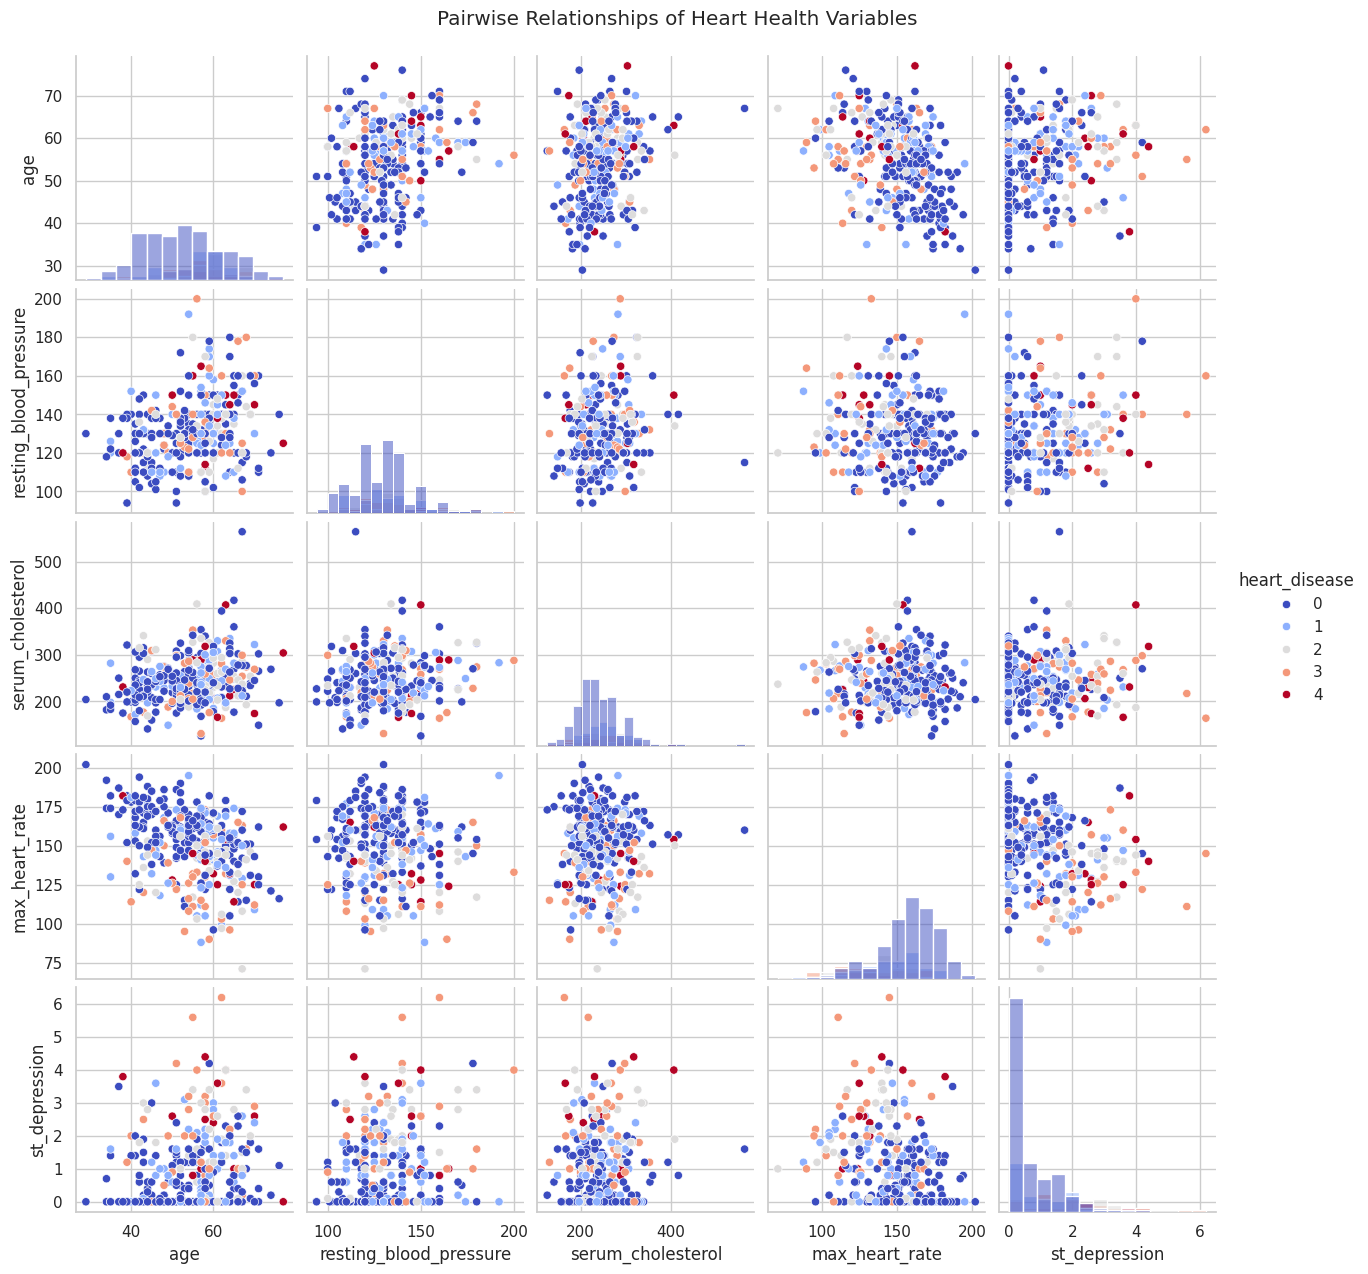

In [38]:
numerical_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate',
                  'st_depression', 'heart_disease']

# Pairplot to visualize multiple relatioships
sns.pairplot(heart_data[numerical_cols], hue="heart_disease", palette="coolwarm", diag_kind='hist')

plt.suptitle("Pairwise Relationships of Heart Health Variables", y=1.02)
plt.show()
